In [2]:
import pandas as pd
from process_datas import get_X_y, scaler_data, encode_names


data = pd.read_csv('data-15 genres-final.csv')
X, y, groups = get_X_y(data)
X = scaler_data(X)
y = encode_names(y)

In [3]:
from classifier import KMeans


kmeans = KMeans(n_clusters=15,
                n_init=3,
                init='random',
                tol=1e-4, 
                random_state=170,
                verbose=True).fit(X)

y_pred = kmeans.predict(X)

Initialization complete
Iteration 0, inertia 23469.823139950877
Iteration 1, inertia 15953.842199804942
Iteration 2, inertia 14741.861360922352
Iteration 3, inertia 14242.47024116863
Iteration 4, inertia 14063.6059057522
Iteration 5, inertia 13940.627636361725
Iteration 6, inertia 13846.249480523842
Iteration 7, inertia 13780.238242872558
Iteration 8, inertia 13731.943088559146
Iteration 9, inertia 13705.461930491201
Iteration 10, inertia 13692.965814713663
Iteration 11, inertia 13682.103299647639
Iteration 12, inertia 13678.21896544116
Iteration 13, inertia 13672.721763749956
Iteration 14, inertia 13667.390250005263
Iteration 15, inertia 13663.472201424083
Iteration 16, inertia 13661.6940674681
Iteration 17, inertia 13659.909138215906
Iteration 18, inertia 13657.623382371352
Iteration 19, inertia 13655.172964636404
Iteration 20, inertia 13652.29529773768
Iteration 21, inertia 13650.955291809798
Iteration 22, inertia 13649.687189505672
Iteration 23, inertia 13647.562253830129
Iteration

In [4]:
# Predicciones
kmeans.labels_

array([6, 1, 0, ..., 9, 6, 3], dtype=int32)

In [5]:
# Centroides
kmeans.cluster_centers_

array([[ 4.21585375e-02,  1.00976446e+00, -4.62343258e-01,
         9.62147774e-01, -1.43012255e-01,  4.93753291e-01,
        -1.28788763e-03,  4.20661449e-01,  3.23735274e-01,
         1.90525756e-01,  9.07494946e-03,  9.41324086e-02,
         1.89886861e-01, -1.38085626e-01,  1.29321856e-02,
        -5.14906404e-01,  3.69294688e-02, -7.95083460e-01,
         3.16674883e-02],
       [ 9.12523488e-01,  8.85126497e-01,  1.56367998e-01,
         7.24605785e-01, -1.33690530e-01,  5.64237270e-01,
         3.98366175e-01,  7.94982299e-01,  8.58500505e-01,
         2.02445959e-01,  7.14171040e-01,  1.79109041e-01,
         1.00734304e+00,  1.14551598e-01,  9.48486087e-01,
         1.34722678e-01,  1.27045154e+00,  9.44937060e-02,
         1.16745416e+00],
       [-5.47517223e-01,  2.46648056e-01, -1.92231062e-01,
         5.70012595e-01, -5.32717776e-01,  2.69823056e-01,
        -5.96475240e-01, -1.68844608e-01, -5.68826257e-01,
        -1.05853491e-01, -7.33970595e-01, -4.20595872e-01,
    

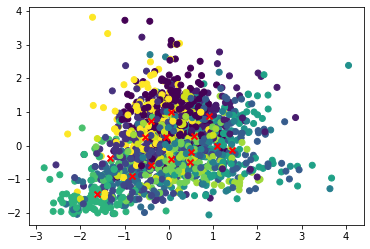

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt


# Graficar predicciones
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], 
            c='r', marker='x', linewidths=2)

In [7]:
import numpy as np
from sklearn import metrics


# Realizar k-means.
kmeans = KMeans(n_clusters=15).fit(X)
y_pred = kmeans.predict(X)


# Calcular la homogeneidad y la integridad de los clusters.
homogeneity = metrics.homogeneity_score(y, y_pred)
completeness = metrics.completeness_score(y, y_pred)

# Calcular el coeficiente de coeficiente de Silhouette para cada muestra.
s = metrics.silhouette_samples(X, y_pred)

# Calcule el coeficiente de Silhouette medio de todos los puntos de datos.
s_mean = metrics.silhouette_score(X, y_pred)

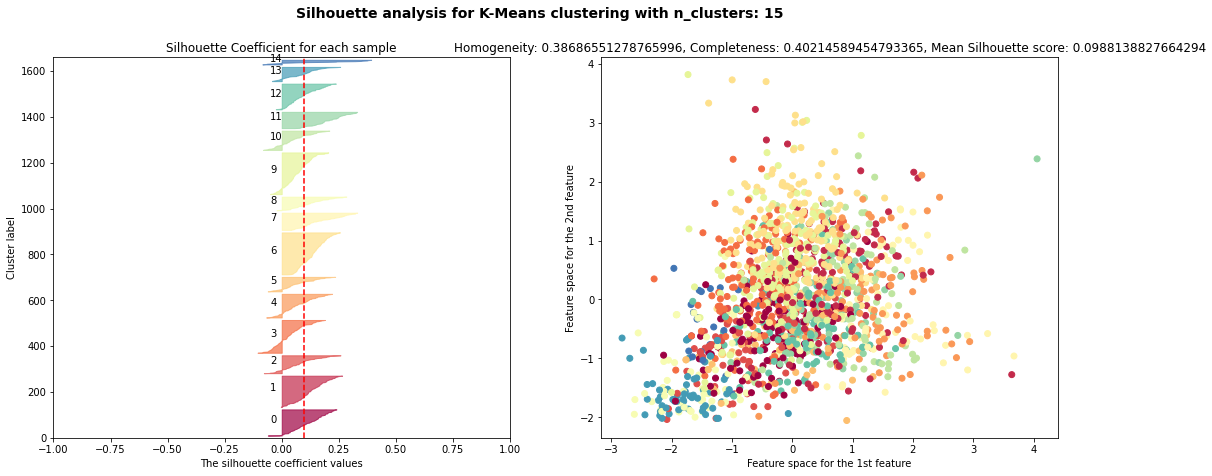

In [8]:
# K-Means: Configuración de los graficos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
    
plt.suptitle('Silhouette analysis for K-Means clustering with n_clusters: {}'.format(15),
             fontsize=14, fontweight='bold')

# Configura el 1er subgrafico.
ax1.set_title('Silhouette Coefficient for each sample')
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.set_xlim([-1, 1])
ax1.set_ylim([0, len(X) + (15 + 1) * 10])

# Configura el 2do subgrafico.
ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity,
                                                                                    completeness,
                                                                                    s_mean))
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

# Grafica el coeficiente de Silhouette para cada muestra.
cmap = cm.get_cmap("Spectral")
y_lower = 10

for i in range(15):
    ith_s = s[y_pred == i]
    ith_s.sort()
    size_cluster_i = ith_s.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cmap(float(i) / 15)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                      facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10
    
# Trazar el coeficiente de silueta medio utilizando la línea discontinua vertical roja.
ax1.axvline(x=s_mean, color="red", linestyle="--")

# Para el 2do subgráfico ------------------------------------------------------------------------------------------

# Grafica las predicciones
colors = cmap(y_pred.astype(float) / 15)
ax2.scatter(X[:,0], X[:,1], c=colors)

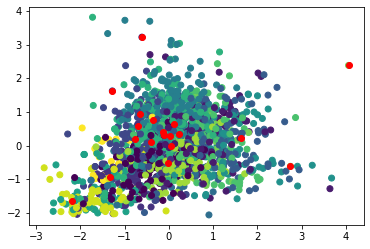

In [9]:
# Datos ruidosos

# Relación para nuestro umbral de distancia, controlando cuántos valores atípicos queremos detectar.
distance_threshold_ratio = 2.0

# Grafica la predición como se hace más arriba
plt.scatter(X[:,0], X[:,1], c=y_pred)

# Para cada grupo i-ésimo, i=0~3 (tenemos 4 grupos en este ejemplo).
for i in range(15):
    
    # Recupere el índice de los puntos de datos que pertenecen al grupo i. 
    # Nota: `np.where()` devuelve los índices en una tupla, por lo que recuperamos los índices usando `tuple[0]`
    indexs_of_X_in_ith_cluster = np.where(y_pred == i)[0]

    # Recuperar los puntos de datos por los índices
    X_in_ith_cluster = X[indexs_of_X_in_ith_cluster]
    
    # Recuperar el centroide.
    centroid = kmeans.cluster_centers_[i].reshape(1, -1)

    # Calcule las distancias entre los puntos de datos y el centroide.
    # distances = metrics.pairwise.euclidean_distances(X, Y) devuelve una matriz de distancias entre X y Y.
    # Igual que: np.sqrt(np.sum(np.square(X - Y), axis=1))
    # Nota: distances.shape = (X_in_ith_cluster.shape[0], 1). A 2-D matrix.
    distances = metrics.pairwise.euclidean_distances(X_in_ith_cluster, centroid)
    
    # Calcule la distancia media para el grupo i-ésimo como nuestro umbral de distancia.
    distance_threshold= np.mean(distances)
    
    # Recuperar el índice de valores atípicos en el grupo i-ésimo 
    # Nota: distances.flatten() aplana la matriz 2-D al vector, para comparar con `distance_threshold` escalar.
    d = distances.flatten()
    puntos = np.where(d > distance_threshold * distance_threshold_ratio)
    
    # Recuperar valores atípicos en el clúster por los índices
    outliers = X_in_ith_cluster[puntos]
    
    # Trazar los valores atípicos en i-ésimo grupo.
    plt.scatter(outliers[:,0], outliers[:,1], c='r')

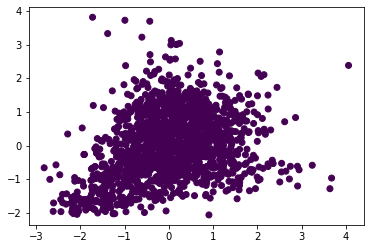

In [20]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3, min_samples=30).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=y_pred)

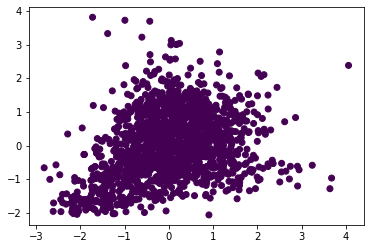

In [15]:
def print_scores(X, y, y_pred):
    print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(y, y_pred)))
    print('Completeness: {}'.format(metrics.completeness_score(y, y_pred)))
    print('Mean Silhouette score: {}'.format(metrics.silhouette_score(X, y_pred)))

In [18]:
# print_scores(X, y, y_pred)